In [15]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv('C:\\Users\\Aditya\\Desktop\\Recommendation Systems\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\u.data')
data.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [30]:
column_names = ['user_id','item_id','ratings','time']
data = pd.read_csv('C:\\Users\\Aditya\\Desktop\\Recommendation Systems\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\u.data',header=None)
data.head()

,0
0,0\t50\t5\t881250949
1,0\t172\t5\t881250949
2,0\t133\t1\t881250949
3,196\t242\t3\t881250949
4,186\t302\t3\t891717742


In [34]:
column_names = ['user_id','item_id','ratings','time']
data = pd.read_table('C:\\Users\\Aditya\\Desktop\\Recommendation Systems\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\u.data')
data.head()

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [36]:
column_names = ['user_id','item_id','ratings','time']
data = pd.read_table('C:\\Users\\Aditya\\Desktop\\Recommendation Systems\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\u.data',names = column_names)
data.head()

,user_id,item_id,ratings,time
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [37]:
movie_titles = pd.read_csv('C:\\Users\\Aditya\\Desktop\\Recommendation Systems\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [38]:
#we are going to merge the two df's
df = pd.merge(data, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,ratings,time,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [41]:
#now we calculate the average rating of each movie 
df.groupby('title')['ratings'].mean().sort_values(ascending = False).head()
#so basically we created a group of users related to each movie and found the average rating given to that movie.

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: ratings, dtype: float64

In [51]:
#now we want to calculate the number of ratings each movie has
df.groupby('title').head()

,user_id,item_id,ratings,time,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [60]:
r1 = df.groupby('title')['ratings'].count().sort_values(ascending =True)
r1.head()

title
Á köldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Name: ratings, dtype: int64

In [67]:
r2=df.groupby('title')['ratings'].count().sort_values(ascending =False) #number of ratings each movie has
r2.head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [86]:
#now we'll create a new dataframe 
r_1 = df.groupby('title')['ratings'].mean()
ratings = pd.DataFrame(r_1)
ratings.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [87]:
ratings['Number of Ratings'] = pd.DataFrame(df.groupby('title')['ratings'].count())
ratings.head()

,ratings,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


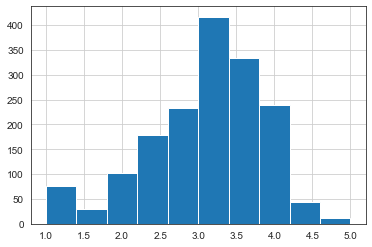

In [89]:
ratings['ratings'].hist()

In [90]:
df.head()

,user_id,item_id,ratings,time,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [98]:
matrix = df.pivot_table(df, index = ["user_id"], columns = ["title"])
matrix.head()

item_id                                     \
title   'Til There Was You (1997) 1-900 (1994) 101 Dalmatians (1996)   
user_id                                                                
0                             NaN          NaN                   NaN   
1                             NaN          NaN                 225.0   
2                             NaN          NaN                   NaN   
3                             NaN          NaN                   NaN   
4                             NaN          NaN                   NaN   

                                                                    \
title   12 Angry Men (1957) 187 (1997) 2 Days in the Valley (1996)   
user_id                                                              
0                       NaN        NaN                         NaN   
1                     178.0        NaN                         NaN   
2                       NaN        NaN                         NaN   
3                       NaN      330.0                         NaN   
4                       NaN        NaN                         NaN   

                                                                          \
title   20,000 Leagues Under the Sea (1954) 2001: A Space Odyssey (1968)   
user_id                                                                    
0                                       NaN                          NaN   
1                                     141.0                        135.0   
2                                       NaN                          NaN   
3                                       NaN                          NaN   
4                                       NaN                          NaN   

                                                                          ...  \
title   3 Ninjas: High Noon At Mega Mountain (1998) 39 Steps, The (1935)  ...   
user_id                                                                   ...   
0                                               NaN                  NaN  ...   
1                                               NaN                  NaN  ...   
2                                             314.0                  NaN  ...   
3                                               NaN                  NaN  ...   
4                                               NaN                  NaN  ...   

                      time                                               \
title   Yankee Zulu (1994) Year of the Horse (1997) You So Crazy (1994)   
user_id                                                                   
0                      NaN                      NaN                 NaN   
1                      NaN                      NaN                 NaN   
2                      NaN                      NaN                 NaN   
3                      NaN                      NaN                 NaN   
4                      NaN                      NaN                 NaN   

                                                                          \
title   Young Frankenstein (1974) Young Guns (1988) Young Guns II (1990)   
user_id                                                                    
0                             NaN               NaN                  NaN   
1                     878542960.0       878543196.0                  NaN   
2                             NaN               NaN                  NaN   
3                             NaN               NaN                  NaN   
4                             NaN               NaN                  NaN   

                                                                       \
title   Young Poisoner's Handbook, The (1995) Zeus and Roxanne (1997)   
user_id                                                                 
0                                         NaN                     NaN   
1                                         NaN                     NaN   
2                                         NaN          

In [103]:
matrix = df.pivot_table( index='user_id',columns='title',values='ratings')
matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
ratings.head()

,ratings,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [107]:
ratings.sort_values('Number of Ratings',ascending = False).head()

,ratings,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [108]:
print('StarWars has the maximum number of ratings.')

StarWars has the maximum number of ratings.


In [110]:
print('We need to find the movie which has the maximum co-relation with the movie StarWars')

We need to find the movie which has the maximum co-relation with the movie StarWars


In [124]:
ratings_given_by_user_to_starwars = matrix['Star Wars (1977)']
ratings_given_by_user_to_starwars .head(60)

user_id
0     5.0
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
11    NaN
12    4.0
13    5.0
14    5.0
15    5.0
16    NaN
17    NaN
18    4.0
19    NaN
20    3.0
21    3.0
22    5.0
23    4.0
24    NaN
25    5.0
26    4.0
27    3.0
28    4.0
29    NaN
30    3.0
31    NaN
32    4.0
33    NaN
34    NaN
35    NaN
36    NaN
37    5.0
38    NaN
39    NaN
40    NaN
41    5.0
42    5.0
43    4.0
44    5.0
45    5.0
46    4.0
47    NaN
48    4.0
49    1.0
50    NaN
51    5.0
52    NaN
53    4.0
54    5.0
55    4.0
56    5.0
57    5.0
58    4.0
59    5.0
Name: Star Wars (1977), dtype: float64

In [112]:
similar_to_starwars = matrix.corrwith(ratings_given_by_user_to_starwars)


C:\Users\Aditya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Aditya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [126]:
ans = pd.DataFrame(similar_to_starwars, columns = ['correlation'])
ans.dropna(inplace=True)
ans.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [127]:
ans.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [129]:
#adding a new column
ans = ans.join(ratings['Number of Ratings'])
ans.head()

,correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [133]:
ans[ans['Number of Ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
